<a href="https://colab.research.google.com/github/devCode21/Deep-learning/blob/main/untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras

from tensorflow.keras.layers import Conv2D , Dense , MaxPool2D ,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [ ]:
# import mnist data set
# ANN

(x_train , y_train ) , (x_test , y_test )=mnist.load_data()

y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

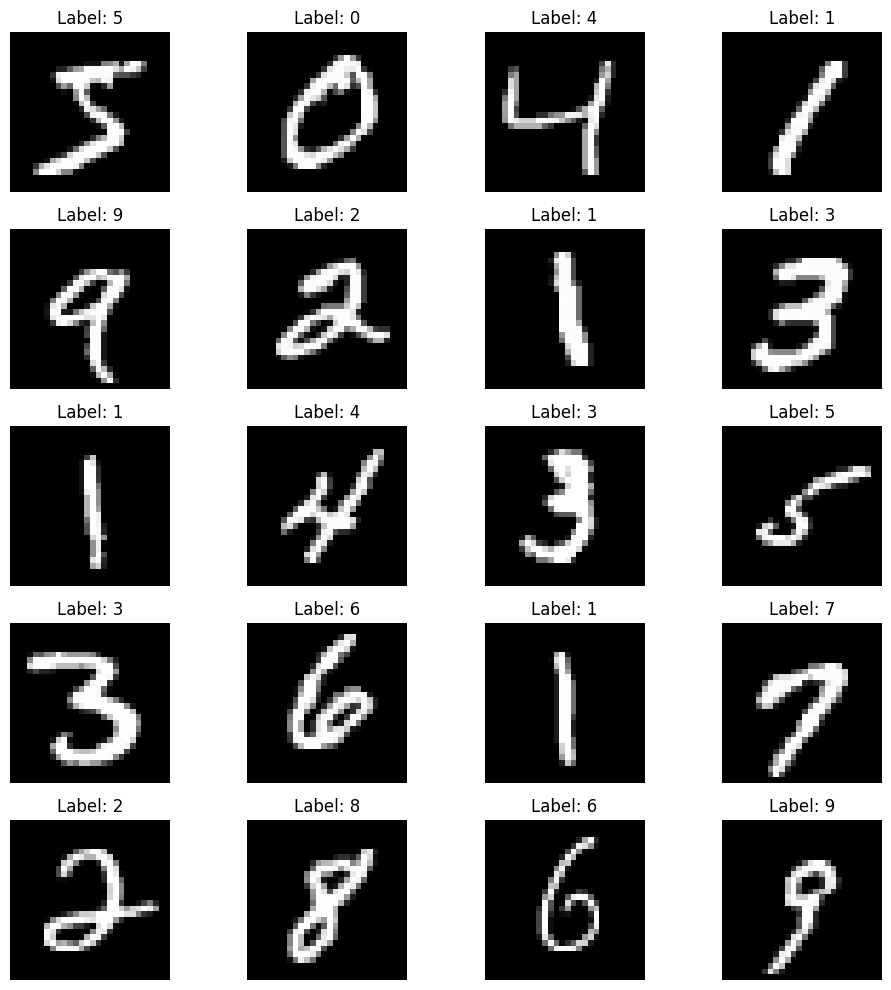

In [ ]:
# printing some sample data
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

for i in range(20):
    plt.subplot(5, 4, i + 1)  # 5 rows, 4 columns grid

    # Show image in grayscale
    plt.imshow(x_train[i], cmap='gray')


    label =  y_train[i]

    plt.title(f"Label: {label}", fontsize=12)
    plt.axis('off')  # Hide axes for cleaner look

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

a=len(np.unique(y_test) )
# since using the softmax function at ouput layer so we should match the output dimeaension hence

y_train=to_categorical(y_train , num_classes=a)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# Normalization
# This cell will be removed as normalization will be done after splitting the data
# X_train = x_train / 255
# X_test = x_test / 255

In [ ]:
# Normalization and splitting for fast computation

import numpy as np

# Shuffle the training data and labels together
indices = np.arange(len(x_train))
np.random.shuffle(indices)

x_train = x_train[indices]
y_train = y_train[indices]

# Split data into training and validation sets
X_train, X_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Normalize the data after splitting
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = x_test / 255.0 # Also normalize the test data

In [ ]:
# model buiilding from scracth

# ANN model
ANN_model=Sequential()

ANN_model.add(Flatten(input_shape=(28,28)))
ANN_model.add(Dense(128 ,activation='relu'))
ANN_model.add(Dense(256 , activation='relu'))
ANN_model.add(Dense(512 , activation='relu'))
ANN_model.add(Dense(10 , activation='softmax'))

ANN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ANN_model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8774 - loss: 0.3977 - val_accuracy: 0.9542 - val_loss: 0.1530
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9679 - loss: 0.1068 - val_accuracy: 0.9669 - val_loss: 0.1110
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9778 - loss: 0.0706 - val_accuracy: 0.9709 - val_loss: 0.0978
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0560 - val_accuracy: 0.9706 - val_loss: 0.1044
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9755 - val_loss: 0.0911


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


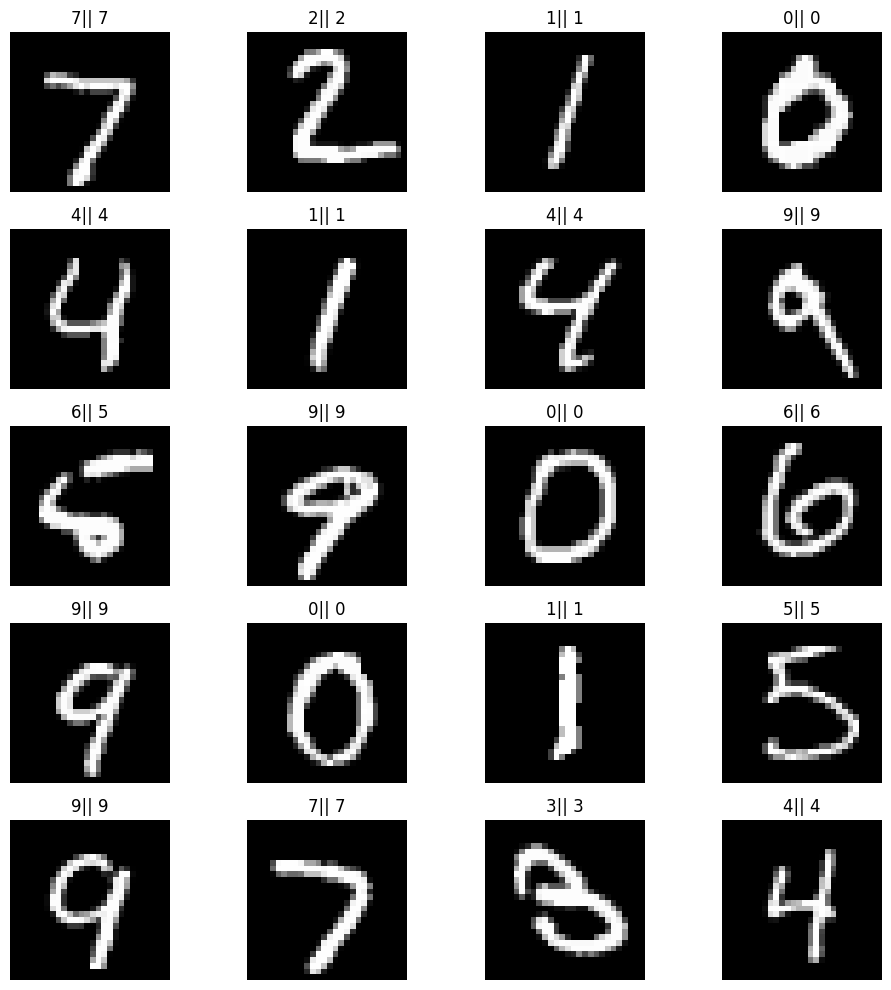

In [ ]:
y_pred=ANN_model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 10))

for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'{y_pred_labels[i] }|| {y_test[i]}')


    plt.axis('off')  # Hide axes for cleaner look

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = ANN_model.evaluate(X_test, y_test_encoded)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1148
Test Loss: 0.0981
Test Accuracy: 0.9728


In [ ]:
# cnn based

(x_train , y_train), (X_test , y_test )=mnist.load_data()


x_train=x_train.reshape(x_train.shape[0],  28 ,28,1)
X_test=X_test.reshape(X_test.shape[0],28 ,28,1)


In [ ]:
X_test=X_test/255

In [ ]:
x_train=x_train/255

In [ ]:
CNN_Model=Sequential()
CNN_Model.add(Conv2D(filters=128, kernel_size=3, activation='relu',input_shape=(28,28,1)))
CNN_Model.add(Conv2D(filters=256 , kernel_size=3 , activation='relu'))
CNN_Model.add(MaxPool2D(pool_size=2))
CNN_Model.add(MaxPool2D(pool_size=2))
CNN_Model.add(Conv2D(filters=128 , kernel_size=3 , input_shape=(1,28,28)))
CNN_Model.add(MaxPool2D(pool_size=2))
CNN_Model.add(Flatten())
CNN_Model.add(Dense(128 ,activation='relu'))
CNN_Model.add(Dense(256 , activation='relu'))
CNN_Model.add(Dense(10 , activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN_Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,746 (2.64 MB)

 Trainable params: 692,746 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

y_pred=CNN_Model.predict(X_test)

y_pred=np.argmax(y_pred ,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


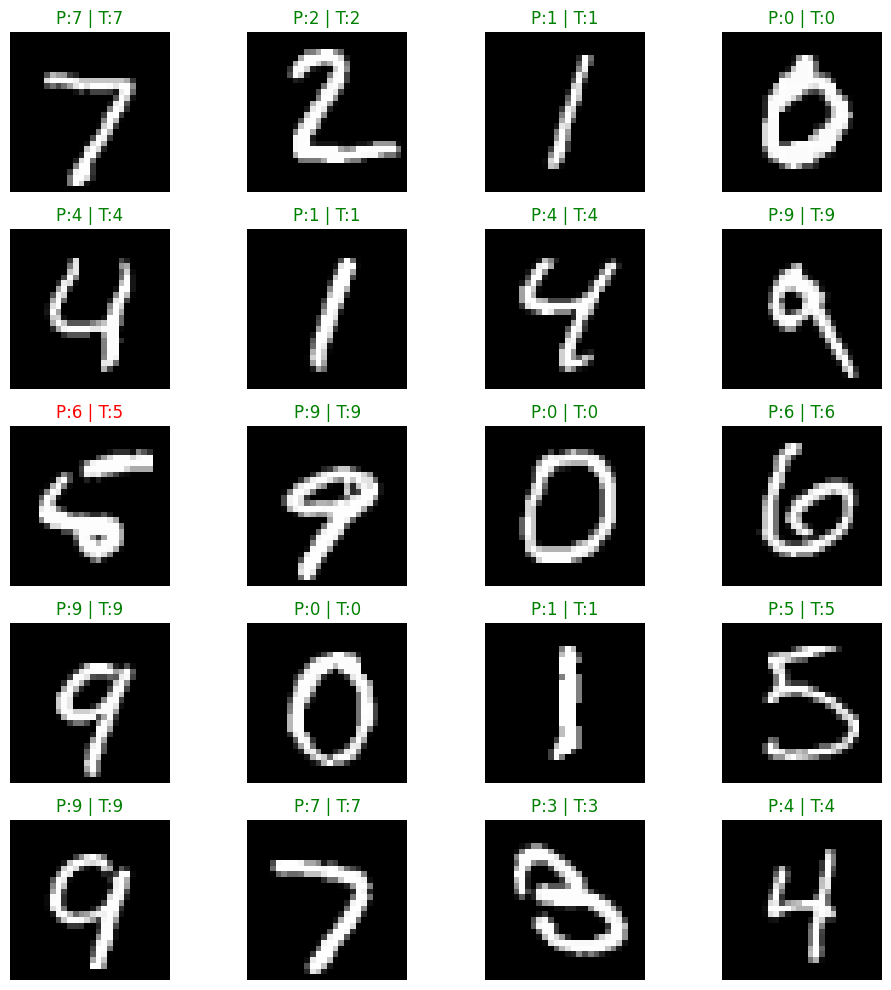

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{y_pred_labels[i]} | T:{y_test[i]}", color='green' if y_pred_labels[i]==y_test[i] else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()
